# Analyse output data from experiment1.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("experiment1.csv")
df

,num_sim,regression_frac,bootstrap_reg_data,iav_normal_correction,qmc,repetition,seed,time,AEP mean,AEP stdev
0,128,0.5,False,False,False,2,349603,1.709547,12.262604,0.355459
1,128,0.5,False,False,False,1,167875,1.713104,12.401996,0.371295
2,128,0.5,True,False,False,2,419654,1.713485,12.331331,0.471650
3,128,0.5,False,False,False,0,523106,1.715357,12.381385,0.345091
4,128,0.5,True,False,False,1,73475,1.721919,12.318972,0.470795
...,...,...,...,...,...,...,...,...,...,...
475,256,1.0,True,False,True,27,140907,3.882682,12.323482,0.322173
476,256,1.0,False,False,True,28,600319,3.871818,12.334435,0.182029
477,256,1.0,True,False,True,28,176949,3.862248,12.288915,0.359770
478,256,1.0,False,False,True,29,85820,3.842627,12.333652,0.181882


<Figure size 800x300 with 0 Axes>

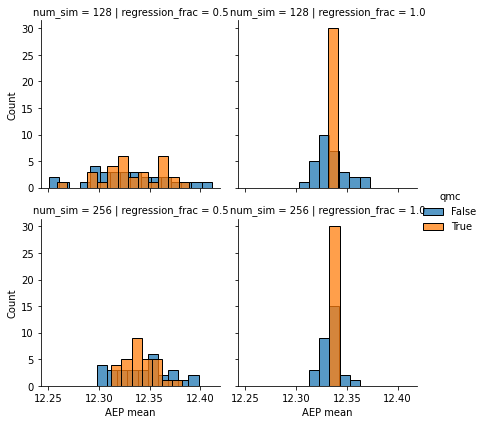

In [20]:
plt.figure(figsize=(8,3),dpi=100)

g = sns.FacetGrid(data=df.query("bootstrap_reg_data==False"), row="num_sim", col="regression_frac", hue="qmc")
g.map(sns.histplot, "AEP mean", binwidth=0.01)
g.add_legend()


<Figure size 800x300 with 0 Axes>

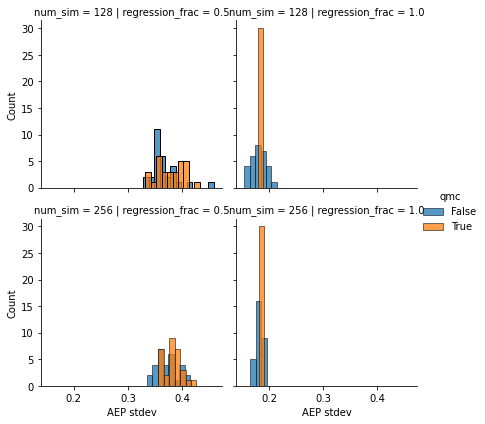

In [21]:
plt.figure(figsize=(8,3),dpi=100)

g = sns.FacetGrid(data=df.query("bootstrap_reg_data==False"), row="num_sim", col="regression_frac", hue="qmc")
g.map(sns.histplot, "AEP stdev", binwidth=0.01)
g.add_legend()

(60, 10)


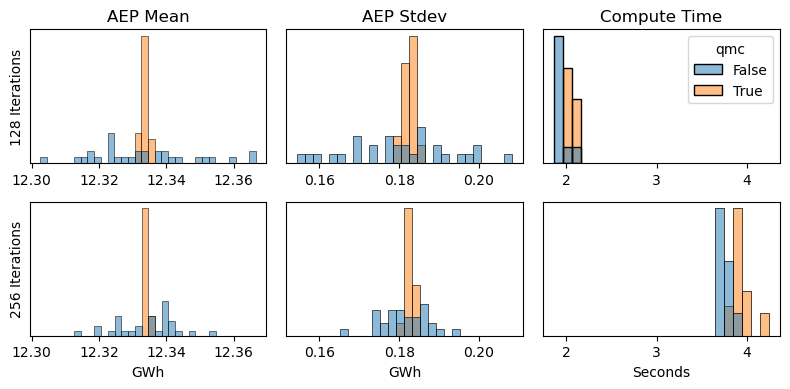

In [37]:
subdf = df.query("regression_frac==1.0 & num_sim==128 & bootstrap_reg_data==False")
print(subdf.shape)
plt.figure(figsize=(8,4),dpi=100)

binwidth=0.002

ax1 = plt.subplot(2,3,1)
sns.histplot(data=subdf, x="AEP mean", hue="qmc", binwidth=binwidth, legend=None)
plt.title("AEP Mean")
plt.xlabel("")
plt.yticks([])
plt.ylabel("128 Iterations")

ax2 = plt.subplot(2,3,2)
sns.histplot(data=subdf, x="AEP stdev", hue="qmc", binwidth=binwidth, legend=None)
plt.title("AEP Stdev")
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

ax3 = plt.subplot(2,3,3)
sns.histplot(data=subdf, x="time", hue="qmc", binwidth=.1)
plt.title("Compute Time")
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

subdf = df.query("regression_frac==1.0 & num_sim==256 & bootstrap_reg_data==False")

plt.subplot(2,3,4, sharex=ax1)
sns.histplot(data=subdf, x="AEP mean", hue="qmc", binwidth=binwidth, legend=None)
plt.xlabel("GWh")
plt.ylabel("256 Iterations")
plt.yticks([])

plt.subplot(2,3,5, sharex=ax2)
sns.histplot(data=subdf, x="AEP stdev", hue="qmc", binwidth=binwidth, legend=None)
plt.ylabel("")
plt.xlabel("GWh")
plt.yticks([])

plt.subplot(2,3,6, sharex=ax3)
sns.histplot(data=subdf, x="time", hue="qmc", binwidth=.1, legend=None)
plt.ylabel("")
plt.xlabel("Seconds")
plt.yticks([])

plt.tight_layout()

In [23]:
exp2 = pd.read_csv("experiment2-convergence.csv")
exp2

,num_sim,regression_frac,bootstrap_reg_data,iav_normal_correction,qmc,repetition,seed,time,AEP mean,AEP stdev
0,2,1.0,False,False,False,0,148606,0.328532,12.382859,0.402883
1,2,1.0,False,False,False,2,923779,0.330663,12.197657,0.090442
2,2,1.0,False,False,False,4,911125,0.336836,12.211181,0.116209
3,2,1.0,False,False,False,1,148343,0.338351,12.261000,0.020363
4,2,1.0,False,False,False,3,993677,0.339155,12.269539,0.058334
...,...,...,...,...,...,...,...,...,...,...
75,256,1.0,False,False,True,0,575909,3.569884,12.333480,0.173155
76,256,1.0,False,False,True,2,726681,3.377951,12.334561,0.171962
77,256,1.0,False,False,True,1,742775,3.380627,12.334724,0.171940
78,256,1.0,False,False,True,3,343943,3.073905,12.333925,0.171592


<Figure size 800x300 with 0 Axes>

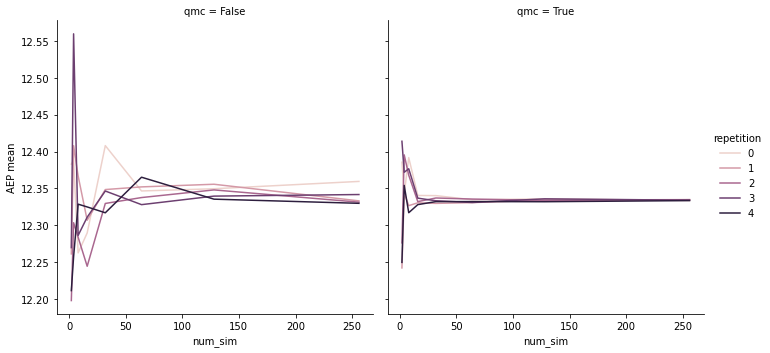

In [24]:
plt.figure(figsize=(8,3),dpi=100)

sns.relplot(
    data=exp2,
    x="num_sim", y="AEP mean",
    hue="repetition", col="qmc",
    kind="line", facet_kws=dict(sharex=False),
)
g.add_legend()

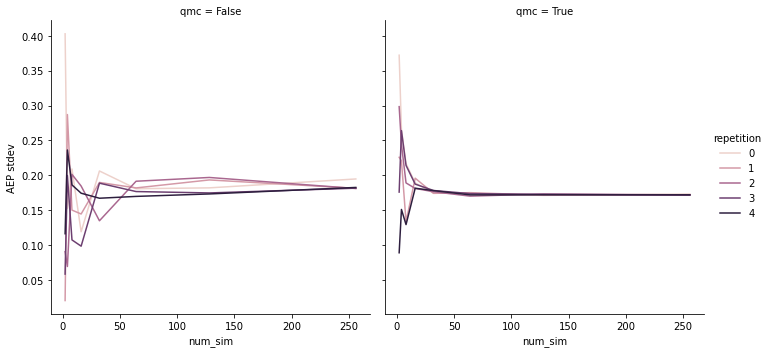

In [15]:
sns.relplot(
    data=exp2,
    x="num_sim", y="AEP stdev",
    hue="repetition", col="qmc",
    kind="line", facet_kws=dict(sharex=False),
)
g.add_legend()

In [35]:
exp3 = pd.read_csv("experiment3-num-sim-qmc.csv")
exp3

,num_sim,regression_frac,bootstrap_reg_data,iav_normal_correction,qmc,repetition,seed,time,AEP mean,AEP stdev
0,4,1.0,False,False,False,0,919138,0.313809,12.367732,0.225453
1,4,1.0,False,False,False,4,913780,0.317313,12.419412,0.302202
2,4,1.0,False,False,False,1,35087,0.320389,12.323868,0.170549
3,4,1.0,False,False,False,3,897049,0.320067,12.331831,0.284198
4,4,1.0,False,False,False,5,485653,0.318452,12.299622,0.152224
...,...,...,...,...,...,...,...,...,...,...
415,256,1.0,False,False,True,25,948473,3.559723,12.332082,0.183015
416,256,1.0,False,False,True,26,781833,3.561520,12.333195,0.183363
417,256,1.0,False,False,True,27,669018,3.532016,12.333248,0.182174
418,256,1.0,False,False,True,28,979380,3.582380,12.333757,0.181684


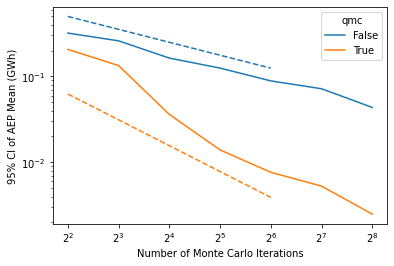

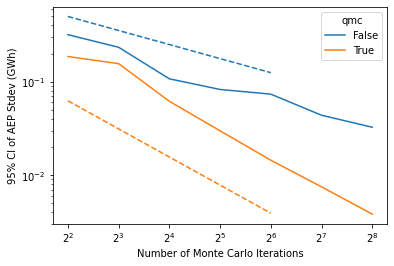

In [36]:
gdf = exp3.groupby(["num_sim", "qmc"]).std().reset_index()
gdf["AEP mean"] *= 4 # To compute 95% CI - assuming normally distributed
gdf["AEP stdev"] *= 4

x = np.logspace(2,6,base=2)

plt.plot(x,1/np.sqrt(x),"--")
plt.plot(x,0.25/x,"--")
sns.lineplot(data=gdf, x="num_sim", y="AEP mean", hue="qmc")
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.ylabel("95% CI of AEP Mean (GWh)")
plt.xlabel("Number of Monte Carlo Iterations")
plt.show()

plt.plot(x,1/np.sqrt(x),"--")
plt.plot(x,0.25/x,"--")
sns.lineplot(data=gdf, x="num_sim", y="AEP stdev", hue="qmc")
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.ylabel("95% CI of AEP Stdev (GWh)")
plt.xlabel("Number of Monte Carlo Iterations")
plt.show()

In [ ]:


sns.lineplot(data=exp3.groupby(["num_sim", "qmc"]).std().reset_index(), x="num_sim", y="AEP stdev", hue="qmc", style="qmc")
plt.xscale('log', base=2)
plt.ylabel("Spread in Standard Devation AEP")
plt.show()